In [1]:
# This notebook is about extracting channels from images in image processing

In [2]:
%matplotlib inline

import os
os.environ["QT_QPA_PLATFORM"] = "xcb"
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import image as image
import easygui 

(432, 768, 3)


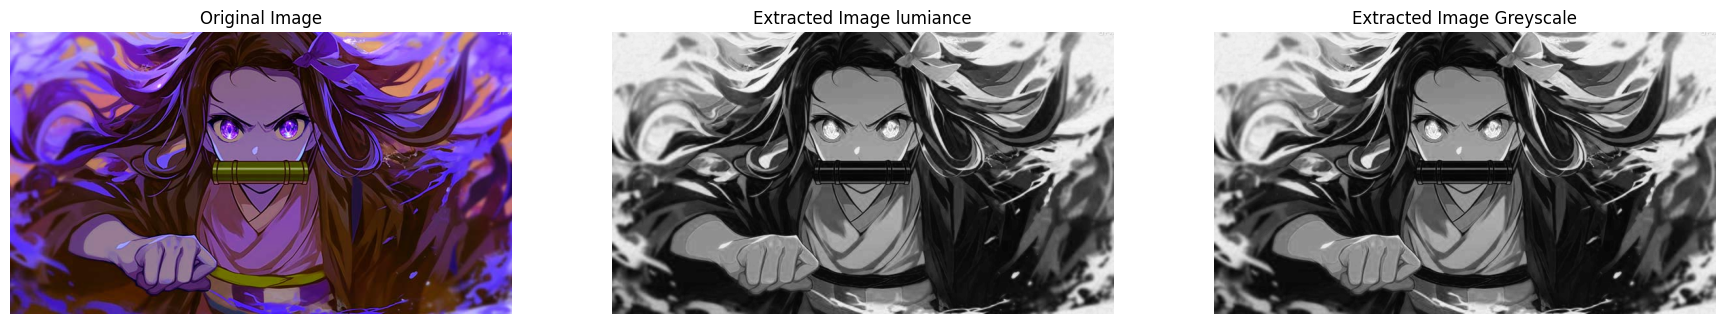

In [29]:
# Tasks one
wallpaper = cv2.imread('Assets/image.jpg')
converted_image_RGB = cv2.cvtColor(wallpaper, cv2.COLOR_RGB2YUV)
extracted_yellow_image = converted_image_RGB.copy()
greyscale_wallpaper = extracted_yellow_image.copy()
greyscale_wallpaper = cv2.cvtColor(greyscale_wallpaper, cv2.COLOR_RGB2GRAY)

extracted_yellow_image[:,:,0] = 0
# extracted_yellow_image[:,:,1] = 0
# extracted_yellow_image[:,:,2] = 0



extracted_yellow_image_rgb = cv2.cvtColor(extracted_yellow_image, cv2.COLOR_YUV2RGB)

# Show an image on the screen using OpenCV
# cv2.imshow("Orginal", wallpaper)
# cv2.imshow("Extracted Image Yellow", extracted_yellow_image_rgb)
# cv2.imshow("Greyscale image", greyscale_wallpaper)

# while True:
#     key = cv2.waitKey(0) & 0xFF  # Mask to get lower byte (ignores modifiers)

#     # Define the keys to check, ignore the 'Super' key or other modifier keys
#     # Typically, you only care about printable keys or specific function keys (e.g., 'q' to quit)
#     if key == ord('q'):  # Press 'q' to exit the loop
#         break

# # Destroy all windows
# cv2.destroyAllWindows()

# Necessary for some Unix-based systems to ensure the window closes
# cv2.waitKey(1)
# key = cv2.waitKey(0) # the 0 here tells openCV to wait indefinitely (until a key is pressed)
# cv2.destroyAllWindows()

# Unix systems require another call to cv2.waitKey after cv2.destoyAllWindows() to avoid a bug where the 
# window doesn't close. The 1ms timeout causes this to exit almost immediately so the user doesn't notice it
cv2.waitKey(1) 

# # Configuration notattion 
# fig = plt.figure(figsize=(22,22))
# plt.subplot(1,3,3)
# plt.title('Original Image')
# plt.imshow(wallpaper)

# plt.subplot(1,3,1)
# plt.imshow(extracted_yellow_image_rgb)
# plt.title('Extracted Image lumiance')

# plt.subplot(1,3,2)
# plt.imshow(extracted_yellow_image_rgb)
# plt.title('Extracted Image lumiance')
# plt.imshow(greyscale_wallpaper, cmap='grey')

# Objected orinted way
fig , ax = plt.subplots(1,3, figsize=(22,22))
ax[0].set_title('Original Image')
ax[0].imshow(wallpaper)
ax[0].axis('off')

ax[1].set_title('Extracted Image lumiance')
ax[1].imshow(greyscale_wallpaper, cmap='gray')
ax[1].axis('off')

ax[2].set_title('Extracted Image Greyscale')
ax[2].imshow(greyscale_wallpaper, cmap='gray')
ax[2].axis('off')

print(extracted_yellow_image_rgb.shape)


In [ ]:
image_selection = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
image = cv2.imread(image_selection)
cv2.imshow('image',image)


# Define the draw function for mouse callback at location
# def draw(event, x, y, flags, param):
#     if event == cv2.EVENT_LBUTTONDOWN:
#         # Coordinates for the center of the square (201, 201) when the mouse is clicked
#         center_x, center_y = 201, 201
#         side_length = 10  # Total side length of the square
#         thickness = 5  # Thickness of the square border

#         # Define top-left and bottom-right corners for the square
#         top_left = (center_x - side_length//2, center_y - side_length//2)
#         bottom_right = (center_x + side_length//2, center_y + side_length//2)

#         # Draw the square at (201, 201) with white color and the given thickness
#         cv2.rectangle(image, top_left, bottom_right, (255, 255, 255), thickness=thickness)

#         # Display the updated image
#         cv2.imshow("image", image)

def draw(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Coordinates for the center of the square are now the mouse click (x, y)
        center_x, center_y = x, y
        length = 10  
        thickness = 5  

        top_left = (center_x - length//2, center_y - length//2)
        bottom_right = (center_x + length//2, center_y + length//2)
        
        cv2.rectangle(image, top_left, bottom_right, (0, 0, 0), thickness=thickness)

        x1, y1 = top_left
        x2, y2 = bottom_right
        roi = image[y1:y2, x1:x2]

        roi_yuv = cv2.cvtColor(roi, cv2.COLOR_RGB2YUV)

        image[y1:y2, x1:x2] = roi_yuv
        
        cv2.imshow("image", image)
        

# Create a window and set the mouse callback to draw the square on click
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw)

# Display the image and keep it open until 'q' is pressed
while True:
    cv2.imshow("image", image)

    # Wait for key press, pressing 'q' will exit the loop
    key = cv2.waitKey(20) & 0xFF
    if key == ord('q'):  # If 'q' is pressed, break the loop
        break

# Clean up and close the window
cv2.destroyAllWindows()

# # Destroy all windows
# cv2.destroyAllWindows()
# cv2.waitKey(1)